# Imports

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [241]:
df = pd.read_csv('Experiment_Result.csv')

In [242]:
df.head()

,Unnamed: 0,block,stimulus_block,stimulus_side,key_press,responses,rt,stimulus,stimulus_2,stimulus_block.1,stimulus_side.1,sub_block,subject,tags1,tags2,time_elapsed,trial_type
0,0,NaN,NaN,NaN,NaN,NaN,37880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37881,instructions
1,1,0.0,training,1.0,D,NaN,4199.8,Training3.png,NaN,training,1.0,0.0,5.0,NaN,NaN,42309,bRMS
2,2,0.0,training,0.0,K,NaN,1642.0,Training10.png,NaN,training,0.0,0.0,5.0,NaN,NaN,44692,bRMS
3,3,0.0,training,0.0,K,NaN,1184.5,Training7.png,NaN,training,0.0,0.0,5.0,NaN,NaN,46503,bRMS
4,4,0.0,training,1.0,D,NaN,1133.9,Training6.png,NaN,training,1.0,0.0,5.0,NaN,NaN,48264,bRMS


In [243]:
df.columns

Index(['Unnamed: 0', 'block', 'stimulus_block', 'stimulus_side', 'key_press',
       'responses', 'rt', 'stimulus', 'stimulus_2', 'stimulus_block.1',
       'stimulus_side.1', 'sub_block', 'subject', 'tags1', 'tags2',
       'time_elapsed', 'trial_type'],
      dtype='object')

In [244]:
df.trial_type.unique()

array(['instructions', 'bRMS', 'survey-multi-choice', 'survey-likert'],
      dtype=object)

# Divide to subjects

In [245]:
def get_brms_missed_count(brms_df):
    brms_missed = brms_df[((brms_df.key_press != 'K') & (brms_df.stimulus_side == 0)) | (
            (brms_df.key_press != 'D') & (brms_df.stimulus_side == 1))]
    return brms_missed.shape[0]

In [246]:
def get_raw_rms_df(single_df, with_training=False):
    if with_training:
        return single_df[single_df.trial_type == 'bRMS']
    else:
        return single_df[(single_df.trial_type == 'bRMS') & (single_df.stimulus_block != "training")]


In [247]:
df_lst = []
one_df = pd.DataFrame()
for index, row in df.iterrows():
    if row['Unnamed: 0'] == 1 and not one_df.empty:
        df_lst.append(one_df)
        one_df = pd.DataFrame()
    one_df = one_df.append(row)


In [248]:
print(len(df_lst))

6


In [249]:
for single_df in df_lst:
    print(single_df.shape)

(1, 17)
(137, 17)
(137, 17)
(137, 17)
(137, 17)
(137, 17)


In [250]:
dfs = []
for single_df in df_lst:
    after_remove_training_df = pd.DataFrame()
    dfs.append(single_df[single_df.stimulus_block != "training"])


In [251]:
def get_rms_standards(brms_df, sd):
    mean_rt = brms_df.rt.mean()
    std_rt = brms_df.rt.std()
    brms_standard_df = brms_df[(brms_df.rt > mean_rt - (sd * std_rt)) & (brms_df.rt < mean_rt + (sd * std_rt))]    
    return brms_standard_df

In [252]:
def remove_bad_boys(single_df, sd):
    new_df = single_df[single_df.rt >= 200]
    new_df = new_df[new_df.rt <= 10000]
    new_df = new_df[new_df.key_press != -1]
    new_df = new_df[new_df['key_press'].notna()]

    new_df = get_rms_standards(new_df, sd)
    return new_df

In [253]:
after_correct = []
for single_df in dfs:
    after_correct.append(remove_bad_boys(single_df, 3))

In [254]:
dfs = after_correct

In [255]:
dfs = dfs[1:]

In [256]:
def plot_rt_for_trial_index(single_df):
    fig, ax = plt.subplots()
    ax.scatter(single_df['Unnamed: 0'], single_df.rt)
    ax.set_xlabel('Unnamed: 0')
    ax.set_ylabel('rt')
    plt.show()

In [257]:
len(dfs)

5

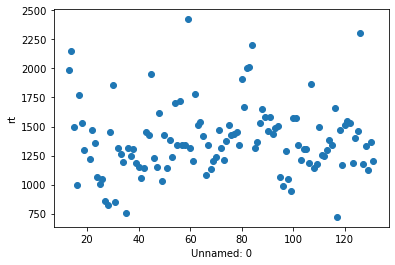

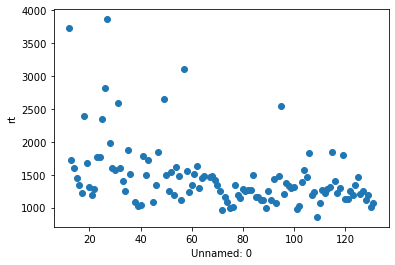

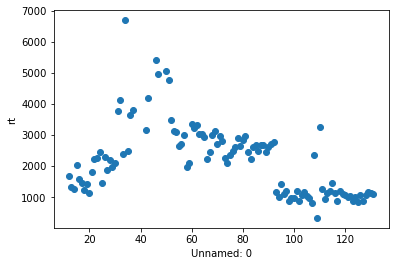

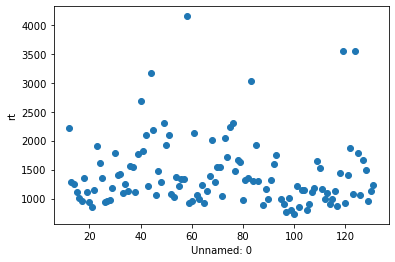

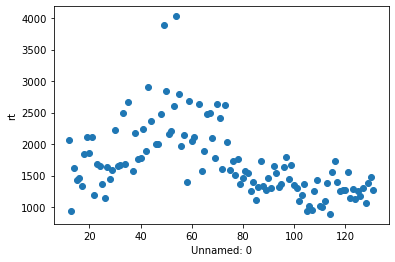

In [258]:
for single_df in dfs:
    plot_rt_for_trial_index(single_df)

In [259]:
def get_won(row):
    if row.key_press == 'K':
        return row.tags1[2:3]
    elif row.key_press == 'D':
        return row.tags2[2:3]


In [260]:
for single_df in dfs:
    single_df['won'] = single_df.apply(get_won, axis=1)

In [261]:
for single_df in dfs:
    print(single_df.key_press.unique())

['D' 'K']
['K' 'D']
['K' 'D']
['D' 'K']
['K' 'D']


In [262]:
for single_df in dfs:
    print(single_df.won.values)

['B' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B'
 'C' 'C' 'B' 'B' 'C' 'B' 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'D' 'D' 'D' 'D' 'E' 'E'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'C' 'C' 'C' 'C' 'D' 'C' 'C'
 'C' 'C' 'C' 'D' 'C' 'D' 'D' 'C' 'D' 'C' 'E' 'E' 'E' 'C' 'C' 'E' 'E' 'E'
 'E' 'C' 'C' 'E' 'C' 'E' 'E' 'C' 'E' 'C']
['A' 'B' 'B' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'C'
 'B' 'C' 'B' 'B' 'C' 'B' 'B' 'B' 'C' 'B' 'C' 'B' 'B' 'B' 'C' 'C' 'C' 'C'
 'A' 'A' 'C' 'A' 'C' 'C' 'C' 'A' 'A' 'C' 'C' 'A' 'B' 'B' 'D' 'B' 'D' 'D'
 'D' 'B' 'D' 'B' 'B' 'D' 'B' 'D' 'D' 'B' 'C' 'D' 'D' 'C' 'C' 'D' 'C' 'C'
 'D' 'C' 'C' 'D' 'D' 'C' 'C' 'D' 'D' 'E' 'C' 'E' 'E' 'C' 'E' 'C' 'C' 'C'
 'E' 'C' 'C' 'C' 'C' 'E' 'C' 'E' 'E' 'D' 'D' 'D' 'E' 'D' 'D' 'D' 'D' 'E'
 'E' 'E' 'E' 'D' 'D' 'D' 'E' 'D']
['A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'A'

In [263]:
def reapeted_measure_anova(single_df):
    return single_df.groupby(['stimulus_block', 'trial_type']).rt.mean().reset_index()

In [264]:
def plot_won_and_rt(single_df):
    fig, ax = plt.subplots()
    ax.scatter(single_df['won'], single_df.rt)
    ax.set_xlabel('won')
    ax.set_ylabel('rt')
    plt.show()

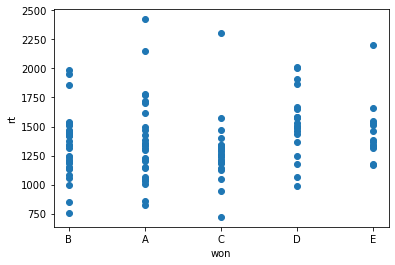

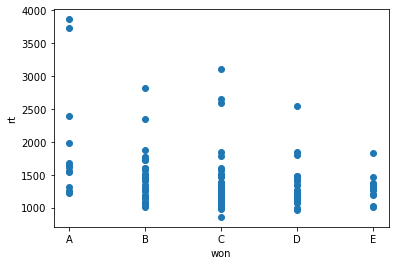

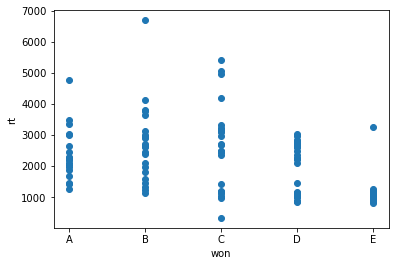

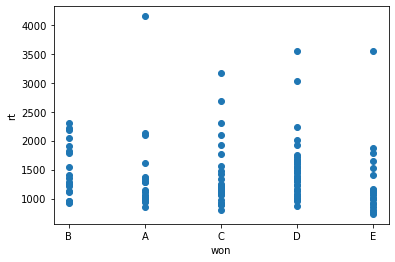

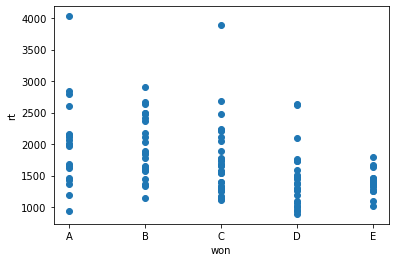

In [265]:
for single_df in dfs:
    plot_won_and_rt(single_df)